# Setup & Imports

Import core libraries for numerical computing and modeling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# Load the Dataset

Read the dataset (original path points to Colab: `/content/advertising.csv`). If you're running locally, place `advertising.csv` next to this notebook or update the path.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/har5hdeep5harma/Codsoft-Data-Science-Practice/refs/heads/main/SALES%20PREDICTION%20USING%20PYTHON/advertising.csv")

# Quick Peek

First 5 rows to get a feel for the columns and values.

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Dataset Shape

Number of rows and columns.

In [4]:
df.shape

(200, 4)

# Data Types & Memory Info

Use `.info()` to inspect dtypes and non-null counts.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Missing Values Check

Count NA values column-wise to identify cleaning needs.

In [6]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


# Exploratory Data Analysis (EDA)

## Distributions (Numeric Columns)

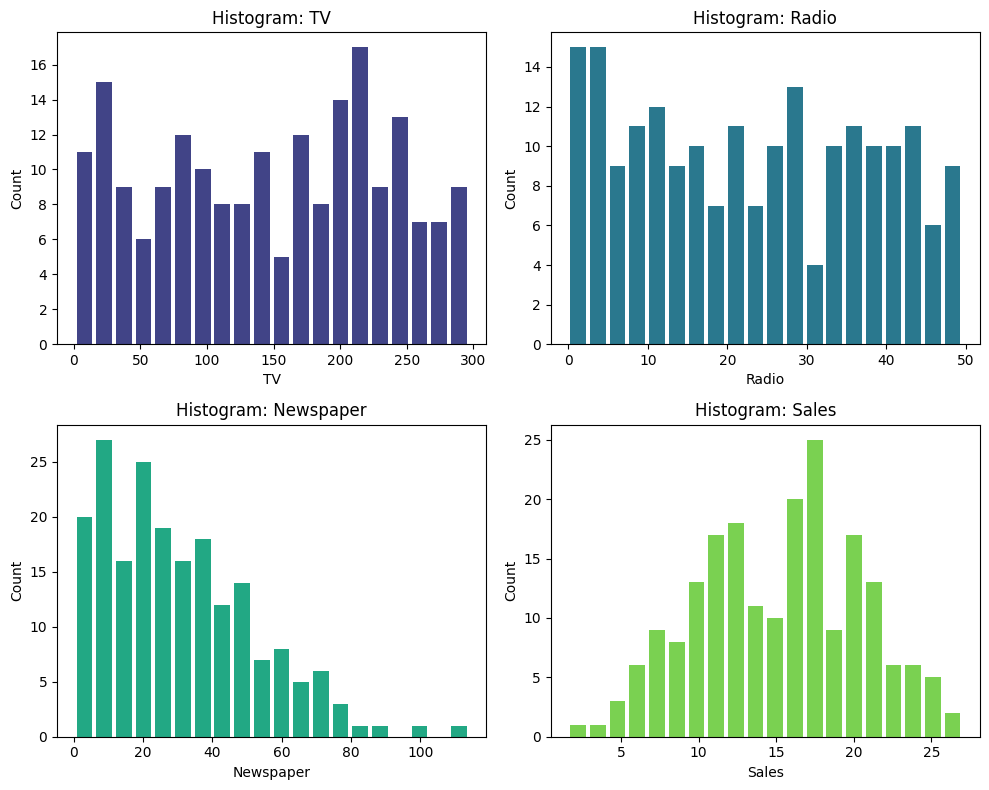

In [7]:
num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

colors = sns.color_palette('viridis', len(num_cols))

for i, col in enumerate(num_cols):
    axes[i].hist(df[col].dropna(), bins=20, color=colors[i], rwidth=0.8)
    axes[i].set_title(f"Histogram: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Correlation Heatmap

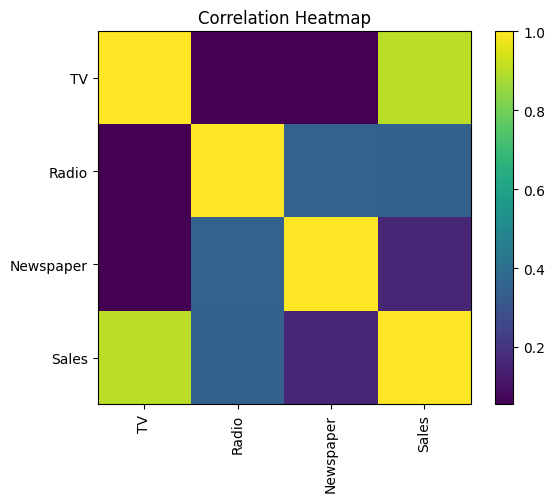

In [8]:
corr = df.select_dtypes(include=[np.number]).corr()
if corr.shape[0] >= 2:
    plt.figure(figsize=(6,5))
    plt.imshow(corr, interpolation='nearest')
    plt.title("Correlation Heatmap")
    plt.xticks(range(corr.shape[1]), corr.columns, rotation=90)
    plt.yticks(range(corr.shape[0]), corr.index)
    plt.colorbar()
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for a heatmap.")

## Feature–Target Relationships

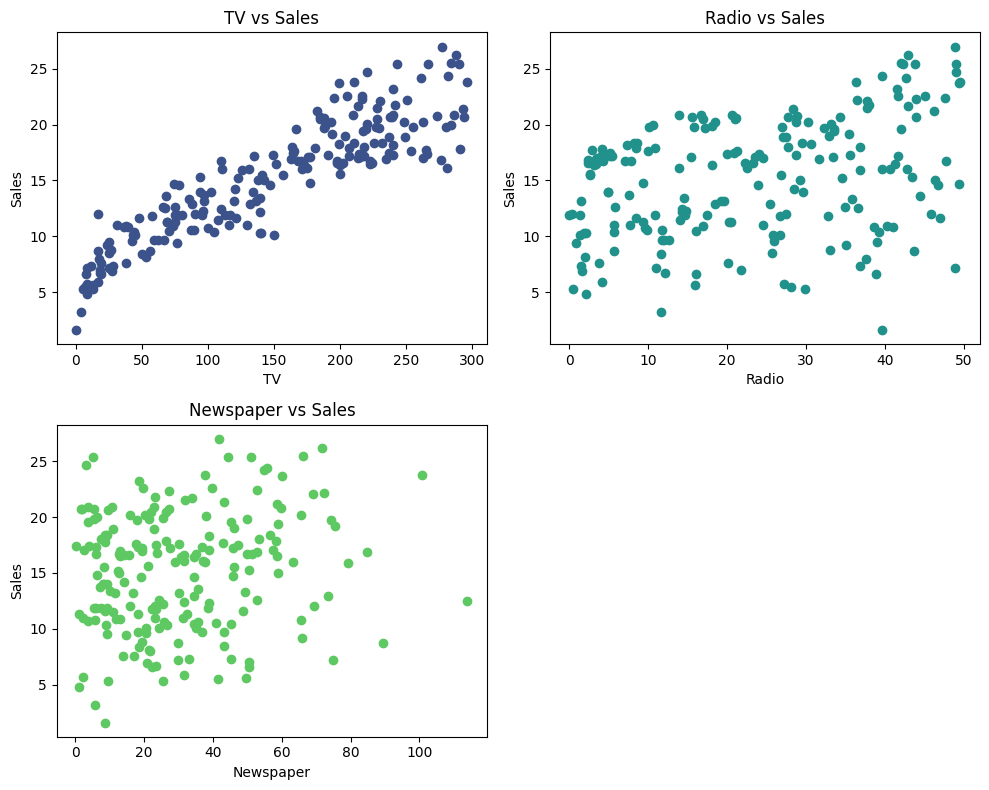

In [9]:
import numpy as np
import matplotlib.pyplot as plt

target_candidates = ["Sales", "sales", "Item_Outlet_Sales", "Weekly_Sales", "y"]
target = next((c for c in df.columns if c in target_candidates), None)

if target is None:
    print("No obvious target column found (looked for: ", target_candidates, "). Skipping target plots.")
else:
    num_cols = [c for c in df.columns if c != target and np.issubdtype(df[c].dtype, np.number)]

    if num_cols:
        corrs = df[num_cols + [target]].corr()[target].drop(target).abs().sort_values(ascending=False)
        top = list(corrs.head(4).index)

        fig, axes = plt.subplots(2, 2, figsize=(10, 8))
        axes = axes.flatten()

        colors = sns.color_palette('viridis', len(top))

        for i, col in enumerate(top):
            axes[i].scatter(df[col], df[target], color=colors[i])
            axes[i].set_title(f"{col} vs {target}")
            axes[i].set_xlabel(col)
            axes[i].set_ylabel(target)

        for j in range(len(top), len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()
    else:
        print("No numeric predictors found for scatter plots with target.")

# Feature Selection (as per original)

Model was set up with `TV` as the single feature.

In [10]:
X = df[["TV"]]
y = df["Sales"]

# Train/Test Split

Split features and target into training and test sets.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Definition

Instantiate a Linear Regression model.

In [12]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# R² Metric

Compute the coefficient of determination on the test set.

In [13]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score ", r2)
print("Mean Squared Error ", mse)

R2 Score  0.802561303423698
Mean Squared Error  6.101072906773963


# RMSE Metric

Root Mean Squared Error for magnitude of errors.

In [14]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error ", rmse)

Root Mean Squared Error  2.470035001123256
